In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Disaster_Dataset .csv')
df

,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,Volcanic Eruption,India,19.962542,82.590546,2025-11-16,6,28135,2556182.54,38.71,No,0.69,0
19996,19997,Volcanic Eruption,Japan,35.853659,138.522874,2025-04-08,2,4340,1228534.00,7.67,No,0.18,0
19997,19998,Hurricane,Philippines,13.720136,121.306074,2025-08-26,8,44663,8518260.66,9.76,Yes,0.75,1
19998,19999,Volcanic Eruption,India,19.959071,77.272460,2023-03-24,7,37484,10802942.53,13.87,Yes,0.77,1


In [6]:
print("Dataset Shape:", df.shape)

Dataset Shape: (20000, 13)


In [7]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['event_id', 'disaster_type', 'location', 'latitude', 'longitude', 'date', 'severity_level', 'affected_population', 'estimated_economic_loss_usd', 'response_time_hours', 'aid_provided', 'infrastructure_damage_index', 'is_major_disaster']


In [8]:
print("First few rows:")
print(df.head())

First few rows:
   event_id      disaster_type location   latitude  longitude        date  \
0         1           Wildfire    Chile -34.681672 -71.819529  2025-08-27   
1         2          Hurricane    India  22.128569  78.023951  2023-05-29   
2         3  Volcanic Eruption    Italy  42.316058  11.031447  2023-01-15   
3         4            Drought    Chile -33.436253 -69.984615  2024-02-08   
4         5  Volcanic Eruption   Turkey  39.400977  37.006822  2023-12-23   

   severity_level  affected_population  estimated_economic_loss_usd  \
0               8                31104                   2768213.39   
1               5                29340                   5996226.87   
2               7                34804                   9222541.48   
3               8                31191                   1827703.09   
4               8                46284                  13435921.49   

   response_time_hours aid_provided  infrastructure_damage_index  \
0                 5.12    

In [9]:
print("Data Types:")
print(df.dtypes)

Data Types:
event_id                         int64
disaster_type                   object
location                        object
latitude                       float64
longitude                      float64
date                            object
severity_level                   int64
affected_population              int64
estimated_economic_loss_usd    float64
response_time_hours            float64
aid_provided                    object
infrastructure_damage_index    float64
is_major_disaster                int64
dtype: object


In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
event_id                       0
disaster_type                  0
location                       0
latitude                       0
longitude                      0
date                           0
severity_level                 0
affected_population            0
estimated_economic_loss_usd    0
response_time_hours            0
aid_provided                   0
infrastructure_damage_index    0
is_major_disaster              0
dtype: int64


In [11]:
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
           event_id      latitude     longitude  severity_level  \
count  20000.000000  20000.000000  20000.000000    20000.000000   
mean   10000.500000     18.749811     41.976629        5.489300   
std     5773.647028     25.026759     82.535922        2.866269   
min        1.000000    -43.127383   -102.133704        1.000000   
25%     5000.750000      3.560059      8.346726        3.000000   
50%    10000.500000     24.361006     74.600322        5.000000   
75%    15000.250000     38.285895    117.460836        8.000000   
max    20000.000000     48.452161    145.902669       10.000000   

       affected_population  estimated_economic_loss_usd  response_time_hours  \
count         20000.000000                 2.000000e+04         20000.000000   
mean          27641.248950                 4.831073e+06            36.369664   
std           16017.199074                 3.624308e+06            20.420570   
min               0.000000                 0.000000e+00   

## Data Preprocessing and Feature Engineering

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from datetime import datetime

df_processed = df.copy()

df_processed['date'] = pd.to_datetime(df_processed['date'])
df_processed['year'] = df_processed['date'].dt.year
df_processed['month'] = df_processed['date'].dt.month
df_processed['day_of_year'] = df_processed['date'].dt.dayofyear
df_processed['quarter'] = df_processed['date'].dt.quarter

le_disaster = LabelEncoder()
le_location = LabelEncoder()
le_aid = LabelEncoder()

df_processed['disaster_type_encoded'] = le_disaster.fit_transform(df_processed['disaster_type'])
df_processed['location_encoded'] = le_location.fit_transform(df_processed['location'])
df_processed['aid_provided_encoded'] = le_aid.fit_transform(df_processed['aid_provided'])

print("Data preprocessing completed!")
print(f"\nDisaster types: {le_disaster.classes_}")
print(f"\nProcessed data shape: {df_processed.shape}")
df_processed.head()

Data preprocessing completed!

Disaster types: ['Drought' 'Earthquake' 'Flood' 'Hurricane' 'Landslide'
 'Volcanic Eruption' 'Wildfire']

Processed data shape: (20000, 20)


,event_id,disaster_type,location,latitude,longitude,date,severity_level,affected_population,estimated_economic_loss_usd,response_time_hours,aid_provided,infrastructure_damage_index,is_major_disaster,year,month,day_of_year,quarter,disaster_type_encoded,location_encoded,aid_provided_encoded
0,1,Wildfire,Chile,-34.681672,-71.819529,2025-08-27,8,31104,2768213.39,5.12,Yes,0.59,1,2025,8,239,3,6,0,1
1,2,Hurricane,India,22.128569,78.023951,2023-05-29,5,29340,5996226.87,44.43,No,0.26,0,2023,5,149,2,3,1,0
2,3,Volcanic Eruption,Italy,42.316058,11.031447,2023-01-15,7,34804,9222541.48,49.30,No,0.94,1,2023,1,15,1,5,3,0
3,4,Drought,Chile,-33.436253,-69.984615,2024-02-08,8,31191,1827703.09,65.56,Yes,0.94,1,2024,2,39,1,0,0,1
4,5,Volcanic Eruption,Turkey,39.400977,37.006822,2023-12-23,8,46284,13435921.49,60.96,No,0.92,1,2023,12,357,4,5,6,0


## Step 2: Exploratory Data Analysis

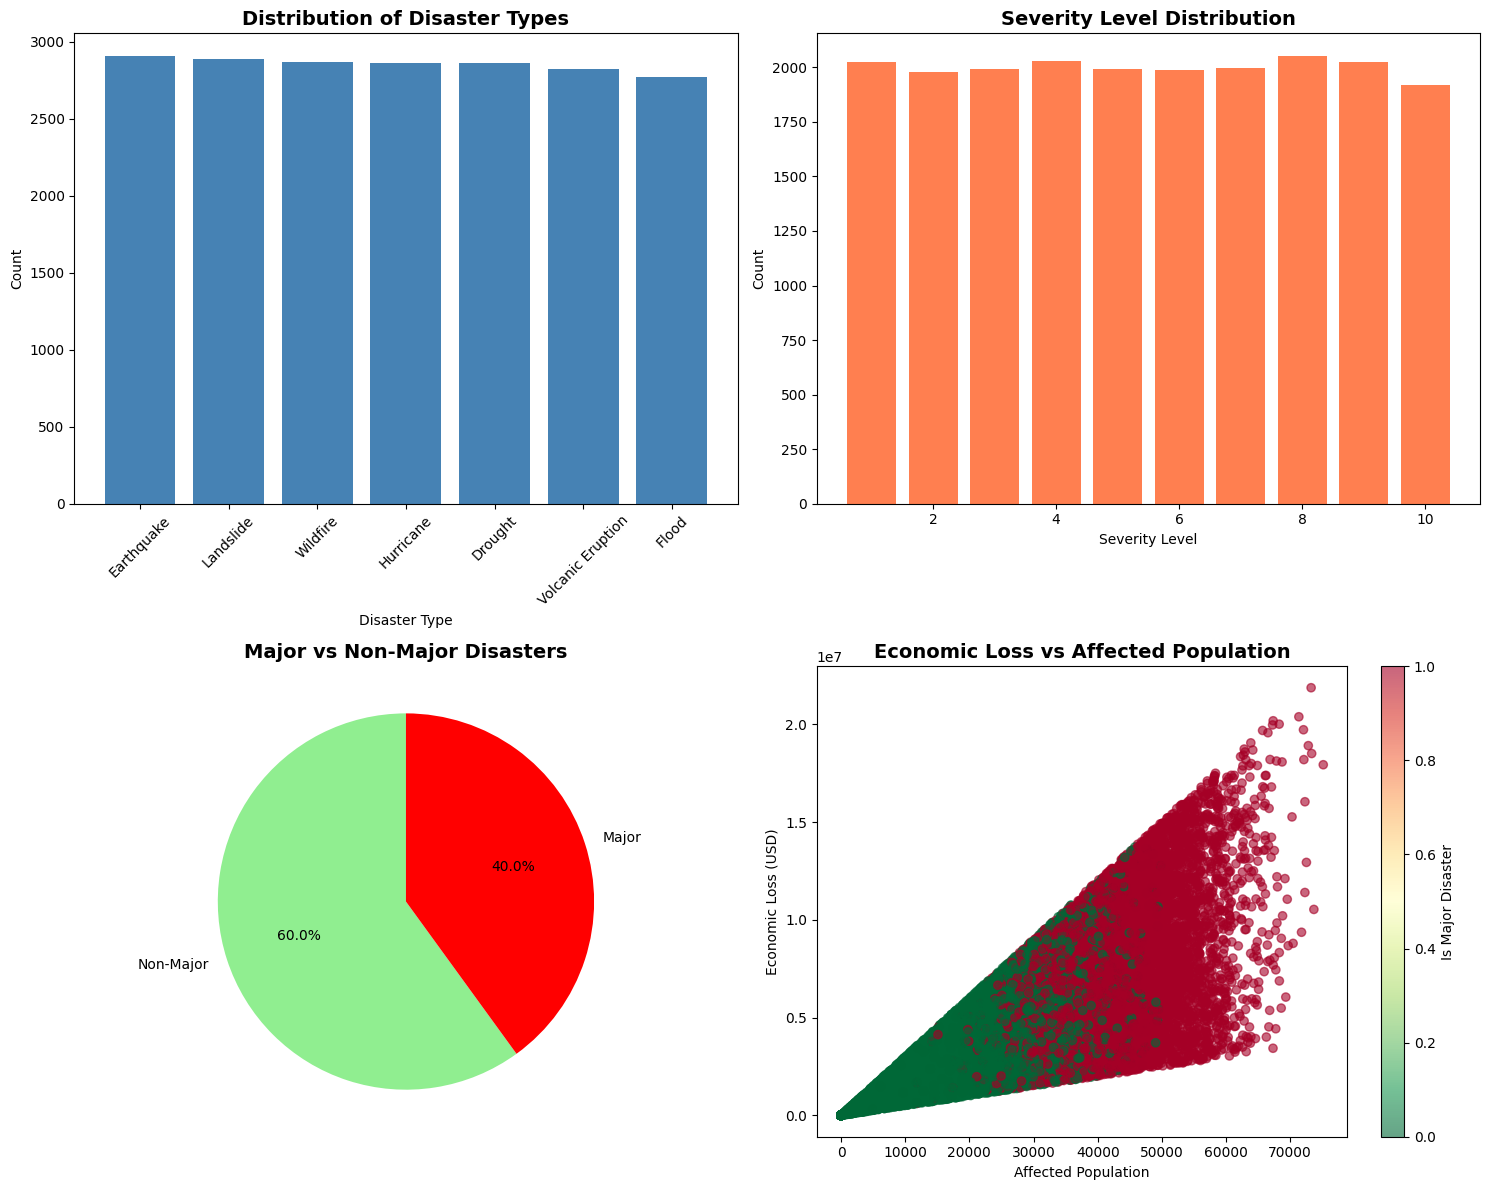

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

disaster_counts = df_processed['disaster_type'].value_counts()
axes[0, 0].bar(disaster_counts.index, disaster_counts.values, color='steelblue')
axes[0, 0].set_title('Distribution of Disaster Types', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Disaster Type')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)

severity_counts = df_processed['severity_level'].value_counts().sort_index()
axes[0, 1].bar(severity_counts.index, severity_counts.values, color='coral')
axes[0, 1].set_title('Severity Level Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Severity Level')
axes[0, 1].set_ylabel('Count')

major_counts = df_processed['is_major_disaster'].value_counts()
labels = ['Non-Major', 'Major']
axes[1, 0].pie(major_counts.values, labels=labels, autopct='%1.1f%%', 
               colors=['lightgreen', 'red'], startangle=90)
axes[1, 0].set_title('Major vs Non-Major Disasters', fontsize=14, fontweight='bold')

scatter = axes[1, 1].scatter(df_processed['affected_population'], 
                            df_processed['estimated_economic_loss_usd'],
                            c=df_processed['is_major_disaster'], 
                            cmap='RdYlGn_r', alpha=0.6)
axes[1, 1].set_title('Economic Loss vs Affected Population', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Affected Population')
axes[1, 1].set_ylabel('Economic Loss (USD)')
plt.colorbar(scatter, ax=axes[1, 1], label='Is Major Disaster')

plt.tight_layout()
plt.show()

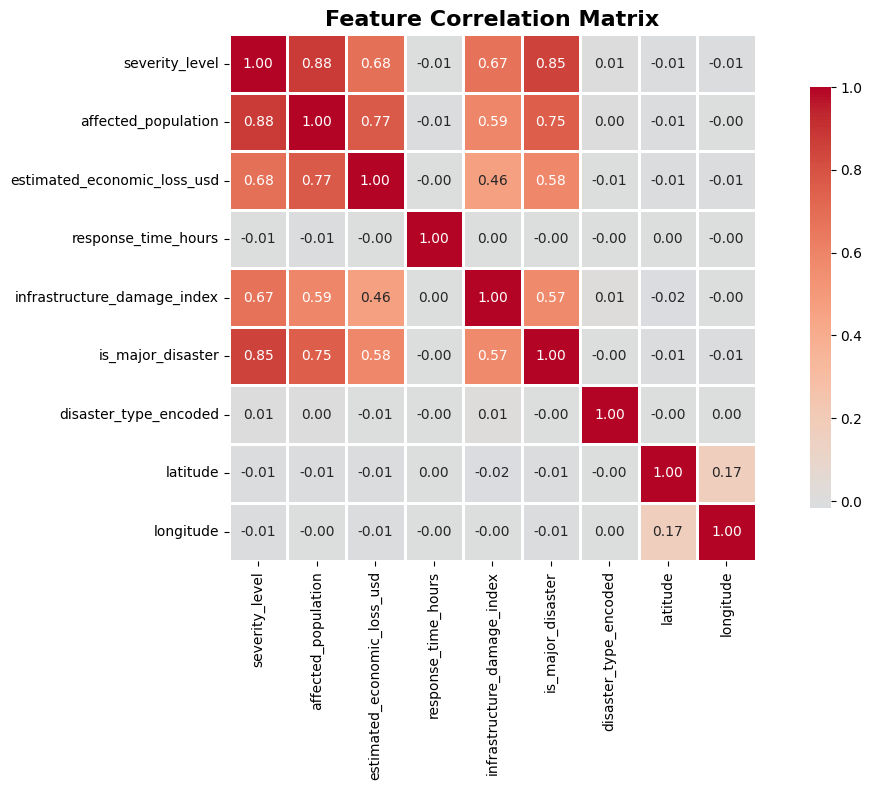


Key Insights:
- Total disasters: 20000
- Major disasters: 8001 (40.0%)
- Average affected population: 27641
- Average economic loss: $4,831,072.65
- Average response time: 36.4 hours


In [14]:
plt.figure(figsize=(12, 8))
correlation_features = ['severity_level', 'affected_population', 'estimated_economic_loss_usd', 
                        'response_time_hours', 'infrastructure_damage_index', 'is_major_disaster',
                        'disaster_type_encoded', 'latitude', 'longitude']
corr_matrix = df_processed[correlation_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"- Total disasters: {len(df_processed)}")
print(f"- Major disasters: {df_processed['is_major_disaster'].sum()} ({df_processed['is_major_disaster'].mean()*100:.1f}%)")
print(f"- Average affected population: {df_processed['affected_population'].mean():.0f}")
print(f"- Average economic loss: ${df_processed['estimated_economic_loss_usd'].mean():,.2f}")
print(f"- Average response time: {df_processed['response_time_hours'].mean():.1f} hours")

## Step 3: Model 1 - Major Disaster Prediction (Classification)

Predict whether a disaster will be classified as "major" based on historical and real-time data.

Training Major Disaster Prediction Model...

DISASTER PREDICTION MODEL PERFORMANCE
Accuracy: 99.95%

Classification Report:
              precision    recall  f1-score   support

   Non-Major       1.00      1.00      1.00      2400
       Major       1.00      1.00      1.00      1600

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



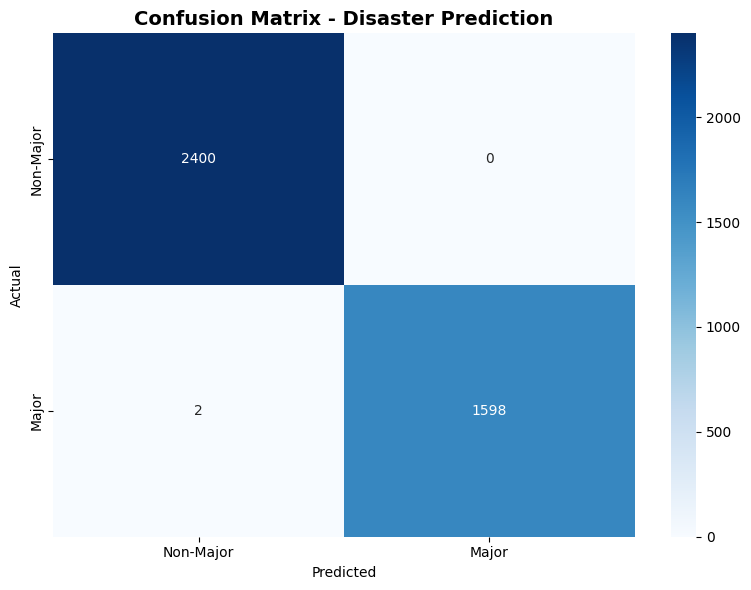

In [15]:
feature_cols = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                'severity_level', 'affected_population', 'infrastructure_damage_index',
                'month', 'quarter', 'day_of_year']

X_disaster = df_processed[feature_cols]
y_disaster = df_processed['is_major_disaster']

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_disaster, y_disaster, test_size=0.2, random_state=42, stratify=y_disaster
)

scaler_disaster = StandardScaler()
X_train_d_scaled = scaler_disaster.fit_transform(X_train_d)
X_test_d_scaled = scaler_disaster.transform(X_test_d)

rf_disaster = RandomForestClassifier(
    n_estimators=100, 
    max_depth=15, 
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

print("Training Major Disaster Prediction Model...")
rf_disaster.fit(X_train_d_scaled, y_train_d)

y_pred_d = rf_disaster.predict(X_test_d_scaled)
y_pred_proba_d = rf_disaster.predict_proba(X_test_d_scaled)

accuracy = accuracy_score(y_test_d, y_pred_d)
print(f"\n{'='*60}")
print(f"DISASTER PREDICTION MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"Accuracy: {accuracy*100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d, target_names=['Non-Major', 'Major']))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_d, y_pred_d)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Major', 'Major'],
            yticklabels=['Non-Major', 'Major'])
plt.title('Confusion Matrix - Disaster Prediction', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

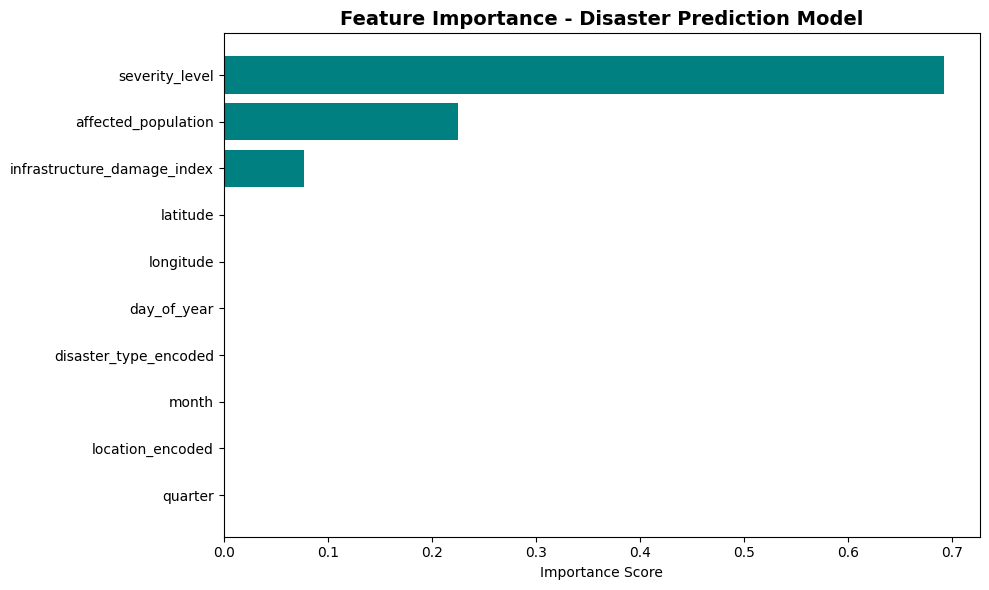


Top 5 Most Important Features:
                       Feature  Importance
4               severity_level    0.692475
5          affected_population    0.225560
6  infrastructure_damage_index    0.077113
2                     latitude    0.001430
3                    longitude    0.001263


In [16]:
feature_importance_d = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_disaster.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_d['Feature'], feature_importance_d['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Disaster Prediction Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(feature_importance_d.head())

## Step 4: Model 2 - Infrastructure Damage Assessment (Regression)

Predict infrastructure damage index based on satellite data and environmental factors.

Training Infrastructure Damage Assessment Model...

DAMAGE ASSESSMENT MODEL PERFORMANCE
Mean Absolute Error (MAE): 0.1270
Root Mean Squared Error (RMSE): 0.1551
R² Score: 0.4506


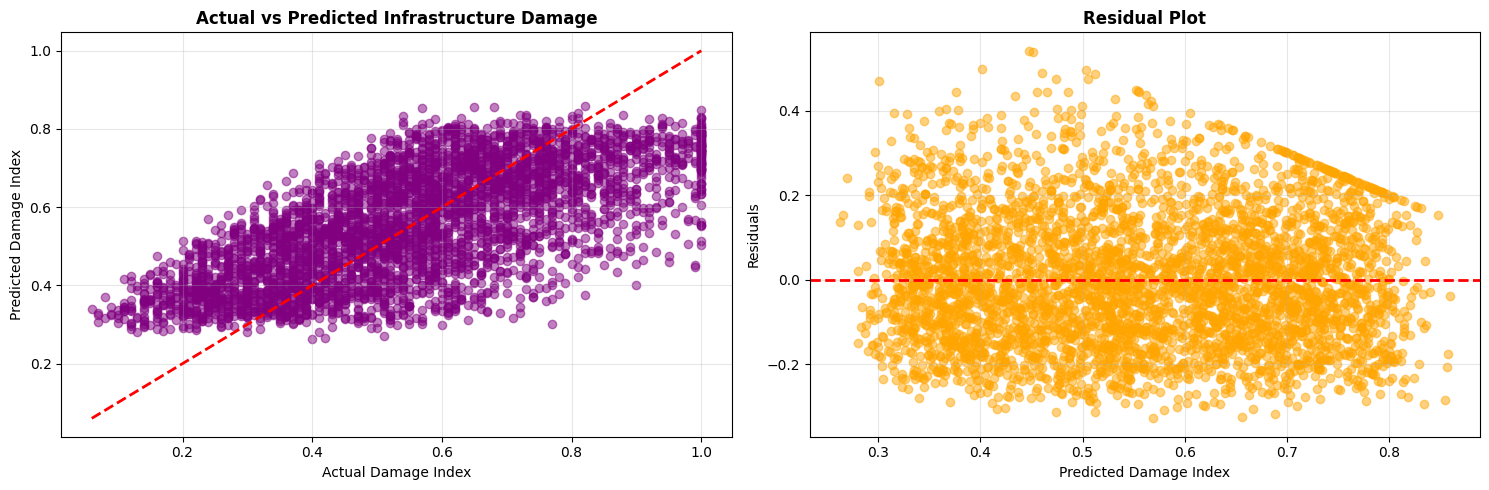

In [17]:
damage_features = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                   'severity_level', 'affected_population', 'estimated_economic_loss_usd',
                   'month', 'quarter']

X_damage = df_processed[damage_features]
y_damage = df_processed['infrastructure_damage_index']

X_train_dam, X_test_dam, y_train_dam, y_test_dam = train_test_split(
    X_damage, y_damage, test_size=0.2, random_state=42
)

scaler_damage = StandardScaler()
X_train_dam_scaled = scaler_damage.fit_transform(X_train_dam)
X_test_dam_scaled = scaler_damage.transform(X_test_dam)

rf_damage = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

print("Training Infrastructure Damage Assessment Model...")
rf_damage.fit(X_train_dam_scaled, y_train_dam)

y_pred_dam = rf_damage.predict(X_test_dam_scaled)

mae = mean_absolute_error(y_test_dam, y_pred_dam)
rmse = np.sqrt(mean_squared_error(y_test_dam, y_pred_dam))
r2 = r2_score(y_test_dam, y_pred_dam)

print(f"\n{'='*60}")
print(f"DAMAGE ASSESSMENT MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_test_dam, y_pred_dam, alpha=0.5, color='purple')
axes[0].plot([y_test_dam.min(), y_test_dam.max()], 
             [y_test_dam.min(), y_test_dam.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Damage Index')
axes[0].set_ylabel('Predicted Damage Index')
axes[0].set_title('Actual vs Predicted Infrastructure Damage', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

residuals = y_test_dam - y_pred_dam
axes[1].scatter(y_pred_dam, residuals, alpha=0.5, color='orange')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Damage Index')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Model 3 - Response Time Optimization (Regression)

Predict optimal response time for emergency services based on disaster characteristics.

Training Response Time Optimization Model...

RESPONSE TIME OPTIMIZATION MODEL PERFORMANCE
Mean Absolute Error (MAE): 17.62 hours
Root Mean Squared Error (RMSE): 20.43 hours
R² Score: -0.0091


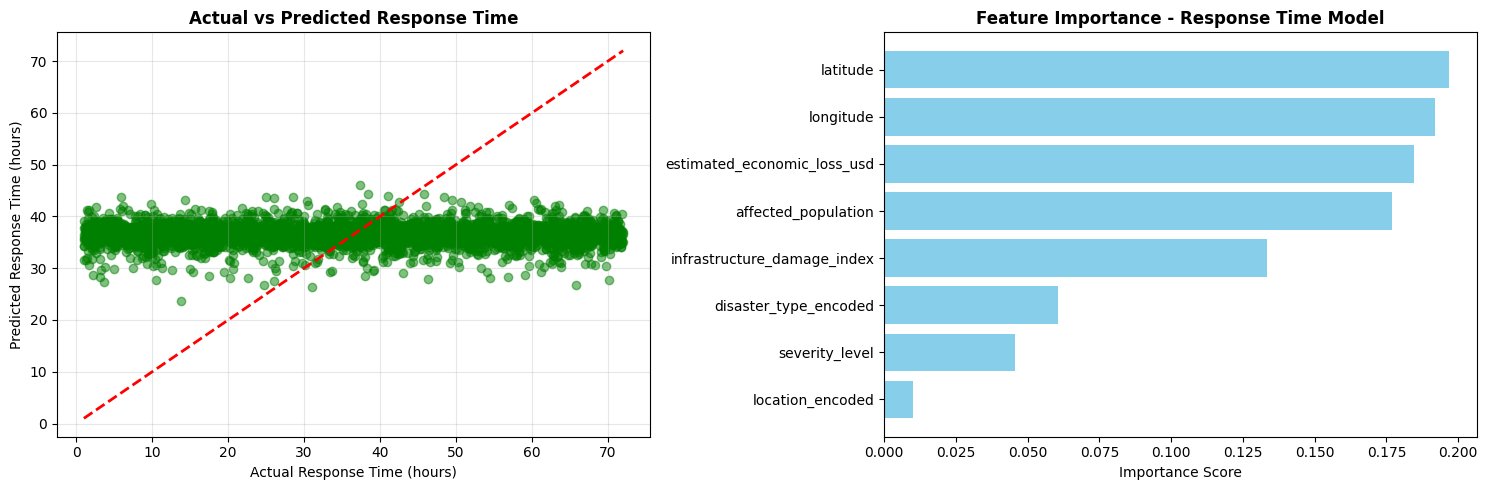

In [18]:
response_features = ['disaster_type_encoded', 'location_encoded', 'latitude', 'longitude',
                     'severity_level', 'affected_population', 'infrastructure_damage_index',
                     'estimated_economic_loss_usd']

X_response = df_processed[response_features]
y_response = df_processed['response_time_hours']

X_train_resp, X_test_resp, y_train_resp, y_test_resp = train_test_split(
    X_response, y_response, test_size=0.2, random_state=42
)

scaler_response = StandardScaler()
X_train_resp_scaled = scaler_response.fit_transform(X_train_resp)
X_test_resp_scaled = scaler_response.transform(X_test_resp)

rf_response = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

print("Training Response Time Optimization Model...")
rf_response.fit(X_train_resp_scaled, y_train_resp)

y_pred_resp = rf_response.predict(X_test_resp_scaled)

mae_resp = mean_absolute_error(y_test_resp, y_pred_resp)
rmse_resp = np.sqrt(mean_squared_error(y_test_resp, y_pred_resp))
r2_resp = r2_score(y_test_resp, y_pred_resp)

print(f"\n{'='*60}")
print(f"RESPONSE TIME OPTIMIZATION MODEL PERFORMANCE")
print(f"{'='*60}")
print(f"Mean Absolute Error (MAE): {mae_resp:.2f} hours")
print(f"Root Mean Squared Error (RMSE): {rmse_resp:.2f} hours")
print(f"R² Score: {r2_resp:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(y_test_resp, y_pred_resp, alpha=0.5, color='green')
axes[0].plot([y_test_resp.min(), y_test_resp.max()], 
             [y_test_resp.min(), y_test_resp.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Response Time (hours)')
axes[0].set_ylabel('Predicted Response Time (hours)')
axes[0].set_title('Actual vs Predicted Response Time', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

feature_importance_resp = pd.DataFrame({
    'Feature': response_features,
    'Importance': rf_response.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(feature_importance_resp['Feature'], feature_importance_resp['Importance'], color='skyblue')
axes[1].set_xlabel('Importance Score')
axes[1].set_title('Feature Importance - Response Time Model', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Step 6: Emergency Response Decision Support System

Create an intelligent system to provide actionable recommendations for emergency response.

In [19]:
def emergency_response_system(disaster_type, location, latitude, longitude, 
                             severity_level, affected_population, economic_loss, 
                             month, quarter, day_of_year=1):
    """
    Comprehensive Emergency Response Decision Support System
    
    Parameters:
    - disaster_type: Type of disaster (e.g., 'Earthquake', 'Flood', 'Hurricane')
    - location: Country/region
    - latitude, longitude: Geographic coordinates
    - severity_level: Severity on scale 1-10
    - affected_population: Number of people affected
    - economic_loss: Estimated economic loss in USD
    - month: Month of occurrence (1-12)
    - quarter: Quarter of year (1-4)
    - day_of_year: Day of year (1-365)
    
    Returns:
    - Comprehensive disaster assessment and response recommendations
    """
    
    try:
        disaster_encoded = le_disaster.transform([disaster_type])[0]
    except:
        disaster_encoded = 0
    
    try:
        location_encoded = le_location.transform([location])[0]
    except:
        location_encoded = 0
    
    disaster_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                               severity_level, affected_population, 0.5,
                               month, quarter, day_of_year]])
    disaster_input_scaled = scaler_disaster.transform(disaster_input)
    
    is_major = rf_disaster.predict(disaster_input_scaled)[0]
    major_probability = rf_disaster.predict_proba(disaster_input_scaled)[0][1]
    
    damage_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                             severity_level, affected_population, economic_loss,
                             month, quarter]])
    damage_input_scaled = scaler_damage.transform(damage_input)
    predicted_damage = rf_damage.predict(damage_input_scaled)[0]
    
    response_input = np.array([[disaster_encoded, location_encoded, latitude, longitude,
                               severity_level, affected_population, predicted_damage, economic_loss]])
    response_input_scaled = scaler_response.transform(response_input)
    predicted_response_time = rf_response.predict(response_input_scaled)[0]
    
    print("="*70)
    print(f"  EMERGENCY RESPONSE DECISION SUPPORT SYSTEM")
    print("="*70)
    print(f"\n📍 DISASTER INFORMATION:")
    print(f"   Type: {disaster_type}")
    print(f"   Location: {location} (Lat: {latitude:.2f}, Lon: {longitude:.2f})")
    print(f"   Severity Level: {severity_level}/10")
    print(f"   Affected Population: {affected_population:,}")
    print(f"   Estimated Economic Loss: ${economic_loss:,.2f}")
    
    print(f"\n🎯 PREDICTION RESULTS:")
    print(f"   Major Disaster Classification: {'YES ⚠️' if is_major else 'NO ✓'}")
    print(f"   Major Disaster Probability: {major_probability*100:.1f}%")
    print(f"   Predicted Infrastructure Damage Index: {predicted_damage:.3f}")
    print(f"   Recommended Response Time: {predicted_response_time:.1f} hours")
    
    if major_probability > 0.7 or severity_level >= 8:
        priority = "CRITICAL 🔴"
        alert_level = "LEVEL 5 - MAXIMUM ALERT"
    elif major_probability > 0.5 or severity_level >= 6:
        priority = "HIGH 🟠"
        alert_level = "LEVEL 4 - HIGH ALERT"
    elif major_probability > 0.3 or severity_level >= 4:
        priority = "MEDIUM 🟡"
        alert_level = "LEVEL 3 - MODERATE ALERT"
    else:
        priority = "LOW 🟢"
        alert_level = "LEVEL 2 - LOW ALERT"
    
    print(f"\n⚡ EMERGENCY PRIORITY: {priority}")
    print(f"   Alert Level: {alert_level}")
    
    print(f"\n📦 RECOMMENDED RESOURCE ALLOCATION:")
    if affected_population > 40000:
        print(f"   Personnel Required: 500+ emergency responders")
        print(f"   Medical Teams: 20+ teams")
        print(f"   Rescue Units: 30+ units")
    elif affected_population > 20000:
        print(f"   Personnel Required: 200-500 emergency responders")
        print(f"   Medical Teams: 10-20 teams")
        print(f"   Rescue Units: 15-30 units")
    else:
        print(f"   Personnel Required: 100-200 emergency responders")
        print(f"   Medical Teams: 5-10 teams")
        print(f"   Rescue Units: 10-15 units")
    
    if predicted_damage > 0.7:
        print(f"   Heavy Equipment: Bulldozers, cranes, excavators (HIGH PRIORITY)")
        print(f"   Temporary Shelters: {int(affected_population * 0.6)} units")
    elif predicted_damage > 0.4:
        print(f"   Heavy Equipment: Moderate deployment required")
        print(f"   Temporary Shelters: {int(affected_population * 0.4)} units")
    else:
        print(f"   Heavy Equipment: Standard deployment")
        print(f"   Temporary Shelters: {int(affected_population * 0.2)} units")
    
    print(f"\n✅ IMMEDIATE ACTION ITEMS:")
    print(f"   1. Activate Emergency Operations Center within {predicted_response_time/2:.1f} hours")
    print(f"   2. Deploy first responders within {predicted_response_time:.1f} hours")
    print(f"   3. Establish communication networks and evacuation routes")
    print(f"   4. Coordinate with local hospitals and emergency services")
    print(f"   5. Set up relief distribution centers")
    
    if disaster_type in ['Earthquake', 'Volcanic Eruption']:
        print(f"   6. Monitor for aftershocks and secondary hazards")
        print(f"   7. Conduct structural assessments of buildings")
    elif disaster_type in ['Flood', 'Hurricane', 'Cyclone']:
        print(f"   6. Monitor water levels and weather conditions")
        print(f"   7. Prepare evacuation of low-lying areas")
    elif disaster_type == 'Wildfire':
        print(f"   6. Create firebreaks and evacuate at-risk zones")
        print(f"   7. Deploy aerial firefighting resources")
    
    if major_probability > 0.6 or predicted_damage > 0.6:
        evacuation_needed = int(affected_population * 0.7)
        print(f"\n🚨 EVACUATION RECOMMENDATION:")
        print(f"   Immediate evacuation of approximately {evacuation_needed:,} people")
        print(f"   Establish {evacuation_needed//500} evacuation centers")
        print(f"   Transportation required: {evacuation_needed//50} buses/vehicles")
    
    print("="*70)
    
    return {
        'is_major_disaster': bool(is_major),
        'major_probability': major_probability,
        'predicted_damage_index': predicted_damage,
        'predicted_response_time_hours': predicted_response_time,
        'priority_level': priority,
        'alert_level': alert_level
    }

print("✓ Emergency Response Decision Support System initialized successfully!")

✓ Emergency Response Decision Support System initialized successfully!


## Step 7: Test the Emergency Response System

Let's test our system with real-world disaster scenarios.

In [20]:
print("TEST CASE 1: Major Earthquake Scenario\n")
result1 = emergency_response_system(
    disaster_type='Earthquake',
    location='Japan',
    latitude=35.6762,
    longitude=139.6503,
    severity_level=9,
    affected_population=50000,
    economic_loss=15000000,
    month=3,
    quarter=1,
    day_of_year=75
)

TEST CASE 1: Major Earthquake Scenario

  EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

📍 DISASTER INFORMATION:
   Type: Earthquake
   Location: Japan (Lat: 35.68, Lon: 139.65)
   Severity Level: 9/10
   Affected Population: 50,000
   Estimated Economic Loss: $15,000,000.00

🎯 PREDICTION RESULTS:
   Major Disaster Classification: YES ⚠️
   Major Disaster Probability: 100.0%
   Predicted Infrastructure Damage Index: 0.787
   Recommended Response Time: 35.7 hours

⚡ EMERGENCY PRIORITY: CRITICAL 🔴
   Alert Level: LEVEL 5 - MAXIMUM ALERT

📦 RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 500+ emergency responders
   Medical Teams: 20+ teams
   Rescue Units: 30+ units
   Heavy Equipment: Bulldozers, cranes, excavators (HIGH PRIORITY)
   Temporary Shelters: 30000 units

✅ IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 17.9 hours
   2. Deploy first responders within 35.7 hours
   3. Establish communication networks and evacuation routes
   4. Coordinate with l

c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
print("\n\nTEST CASE 2: Hurricane Scenario\n")
result2 = emergency_response_system(
    disaster_type='Hurricane',
    location='USA',
    latitude=29.7604,
    longitude=-95.3698,
    severity_level=7,
    affected_population=35000,
    economic_loss=8000000,
    month=8,
    quarter=3,
    day_of_year=220
)

c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(




TEST CASE 2: Hurricane Scenario

  EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

📍 DISASTER INFORMATION:
   Type: Hurricane
   Location: USA (Lat: 29.76, Lon: -95.37)
   Severity Level: 7/10
   Affected Population: 35,000
   Estimated Economic Loss: $8,000,000.00

🎯 PREDICTION RESULTS:
   Major Disaster Classification: YES ⚠️
   Major Disaster Probability: 100.0%
   Predicted Infrastructure Damage Index: 0.624
   Recommended Response Time: 37.3 hours

⚡ EMERGENCY PRIORITY: CRITICAL 🔴
   Alert Level: LEVEL 5 - MAXIMUM ALERT

📦 RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 200-500 emergency responders
   Medical Teams: 10-20 teams
   Rescue Units: 15-30 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 14000 units

✅ IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 18.6 hours
   2. Deploy first responders within 37.3 hours
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and e

c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
print("\n\nTEST CASE 3: Flood Scenario\n")
result3 = emergency_response_system(
    disaster_type='Flood',
    location='pakistan',
    latitude=10.5726,
    longitude=18.3639,
    severity_level=6,
    affected_population=2500,
    economic_loss=300,
    month=6,
    quarter=3,
    day_of_year=160
)



TEST CASE 3: Flood Scenario



c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

📍 DISASTER INFORMATION:
   Type: Flood
   Location: pakistan (Lat: 10.57, Lon: 18.36)
   Severity Level: 6/10
   Affected Population: 2,500
   Estimated Economic Loss: $300.00

🎯 PREDICTION RESULTS:
   Major Disaster Classification: NO ✓
   Major Disaster Probability: 0.0%
   Predicted Infrastructure Damage Index: 0.590
   Recommended Response Time: 36.6 hours

⚡ EMERGENCY PRIORITY: HIGH 🟠
   Alert Level: LEVEL 4 - HIGH ALERT

📦 RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 100-200 emergency responders
   Medical Teams: 5-10 teams
   Rescue Units: 10-15 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 1000 units

✅ IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 18.3 hours
   2. Deploy first responders within 36.6 hours
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and emergency services
   5. Set up relief distribution cent

c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
print("\n\nTEST CASE 2: Hurricane Scenario\n")
result2 = emergency_response_system(
    disaster_type='flood',
    location='india',
    latitude=29.7604,
    longitude=-95.3698,
    severity_level=7,
    affected_population=35000,
    economic_loss=8000000,
    month=8,
    quarter=3,
    day_of_year=220
)

c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(




TEST CASE 2: Hurricane Scenario



c:\Users\Shravan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


  EMERGENCY RESPONSE DECISION SUPPORT SYSTEM

📍 DISASTER INFORMATION:
   Type: flood
   Location: india (Lat: 29.76, Lon: -95.37)
   Severity Level: 7/10
   Affected Population: 35,000
   Estimated Economic Loss: $8,000,000.00

🎯 PREDICTION RESULTS:
   Major Disaster Classification: YES ⚠️
   Major Disaster Probability: 98.9%
   Predicted Infrastructure Damage Index: 0.676
   Recommended Response Time: 38.0 hours

⚡ EMERGENCY PRIORITY: CRITICAL 🔴
   Alert Level: LEVEL 5 - MAXIMUM ALERT

📦 RECOMMENDED RESOURCE ALLOCATION:
   Personnel Required: 200-500 emergency responders
   Medical Teams: 10-20 teams
   Rescue Units: 15-30 units
   Heavy Equipment: Moderate deployment required
   Temporary Shelters: 14000 units

✅ IMMEDIATE ACTION ITEMS:
   1. Activate Emergency Operations Center within 19.0 hours
   2. Deploy first responders within 38.0 hours
   3. Establish communication networks and evacuation routes
   4. Coordinate with local hospitals and emergency services
   5. Set up relief 

## Step 8: Geographic Visualization - Disaster Hotspots

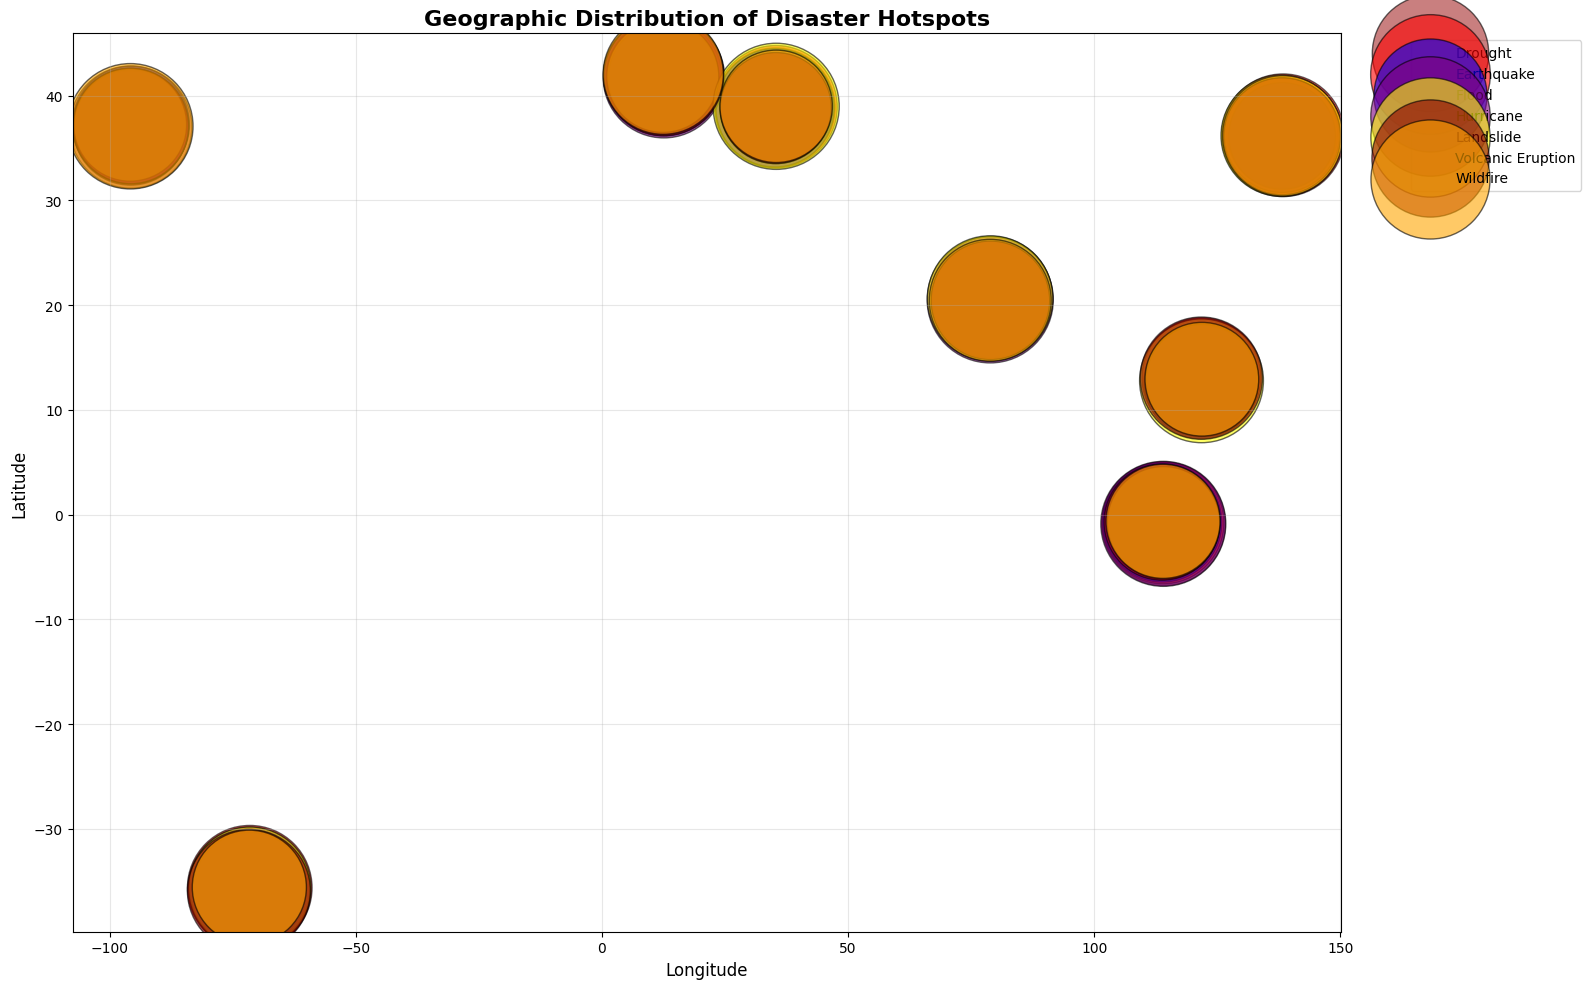


Total unique locations analyzed: 8
Total disaster events mapped: 20000


In [24]:
plt.figure(figsize=(16, 10))

disaster_hotspots = df_processed.groupby(['location', 'disaster_type']).agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'is_major_disaster': 'sum',
    'affected_population': 'sum',
    'estimated_economic_loss_usd': 'sum'
}).reset_index()

disaster_colors = {
    'Earthquake': 'red',
    'Flood': 'blue',
    'Hurricane': 'purple',
    'Wildfire': 'orange',
    'Tornado': 'green',
    'Drought': 'brown',
    'Volcanic Eruption': 'darkred',
    'Tsunami': 'cyan',
    'Cyclone': 'magenta',
    'Landslide': 'yellow'
}

for disaster_type in disaster_hotspots['disaster_type'].unique():
    data = disaster_hotspots[disaster_hotspots['disaster_type'] == disaster_type]
    plt.scatter(data['longitude'], data['latitude'], 
               s=data['is_major_disaster']*50 + 100,
               c=disaster_colors.get(disaster_type, 'gray'),
               alpha=0.6, 
               label=disaster_type,
               edgecolors='black',
               linewidth=1)

plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Geographic Distribution of Disaster Hotspots', fontsize=16, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nTotal unique locations analyzed: {disaster_hotspots['location'].nunique()}")
print(f"Total disaster events mapped: {len(df_processed)}")

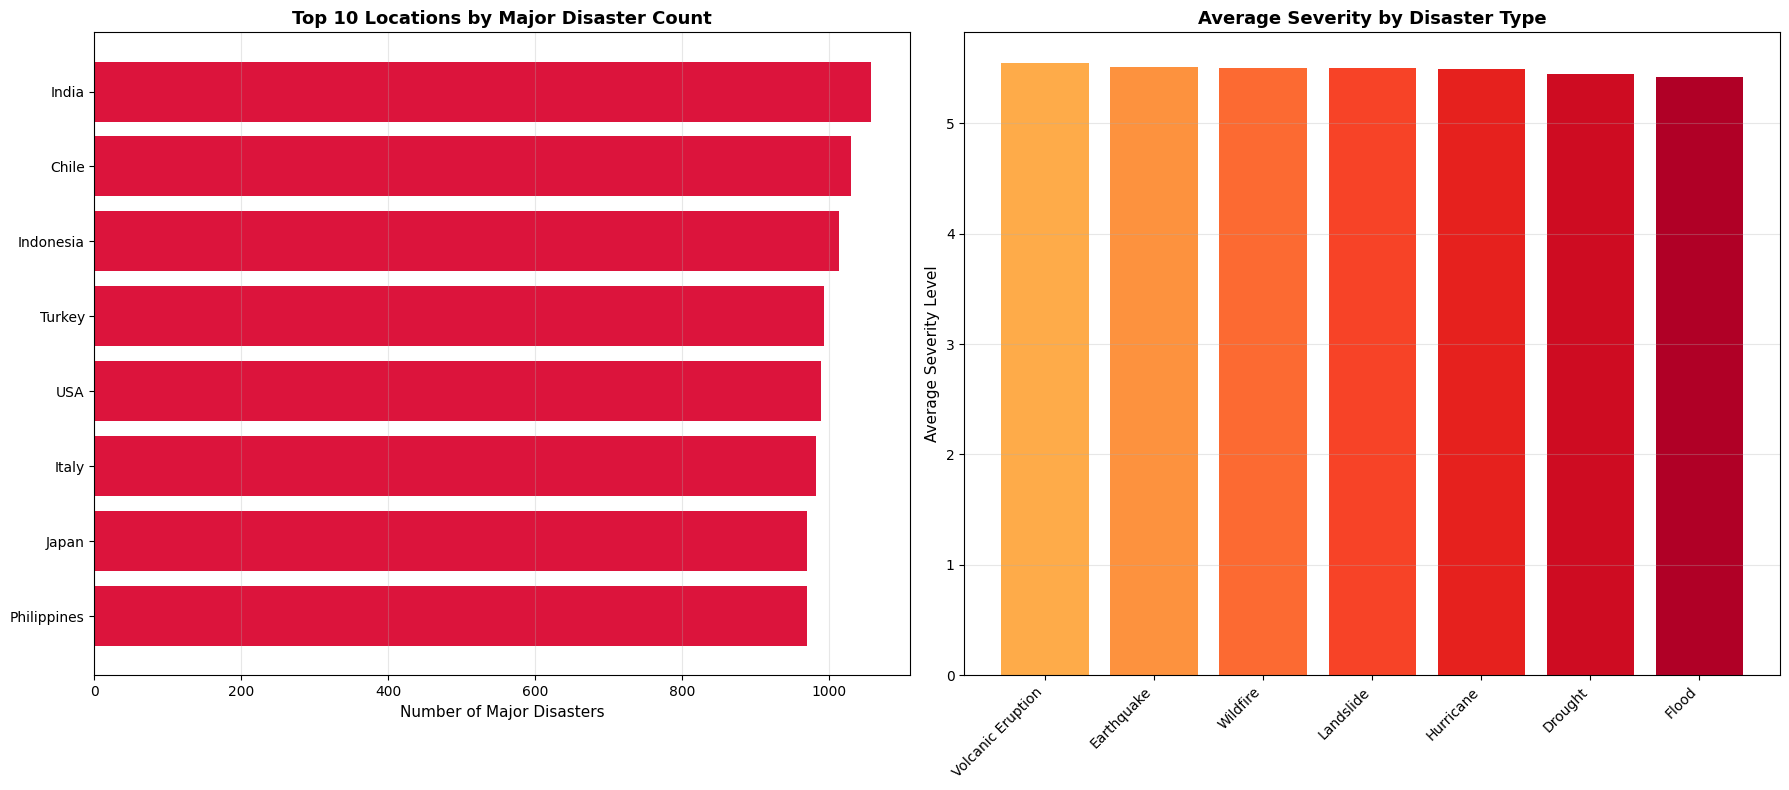

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

top_locations = df_processed.groupby('location').agg({
    'is_major_disaster': 'sum',
    'affected_population': 'sum'
}).sort_values('is_major_disaster', ascending=False).head(10)

axes[0].barh(top_locations.index, top_locations['is_major_disaster'], color='crimson')
axes[0].set_xlabel('Number of Major Disasters', fontsize=11)
axes[0].set_title('Top 10 Locations by Major Disaster Count', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

severity_by_type = df_processed.groupby('disaster_type')['severity_level'].mean().sort_values(ascending=False)
colors_severity = plt.cm.YlOrRd(np.linspace(0.4, 0.9, len(severity_by_type)))
axes[1].bar(range(len(severity_by_type)), severity_by_type.values, color=colors_severity)
axes[1].set_xticks(range(len(severity_by_type)))
axes[1].set_xticklabels(severity_by_type.index, rotation=45, ha='right')
axes[1].set_ylabel('Average Severity Level', fontsize=11)
axes[1].set_title('Average Severity by Disaster Type', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

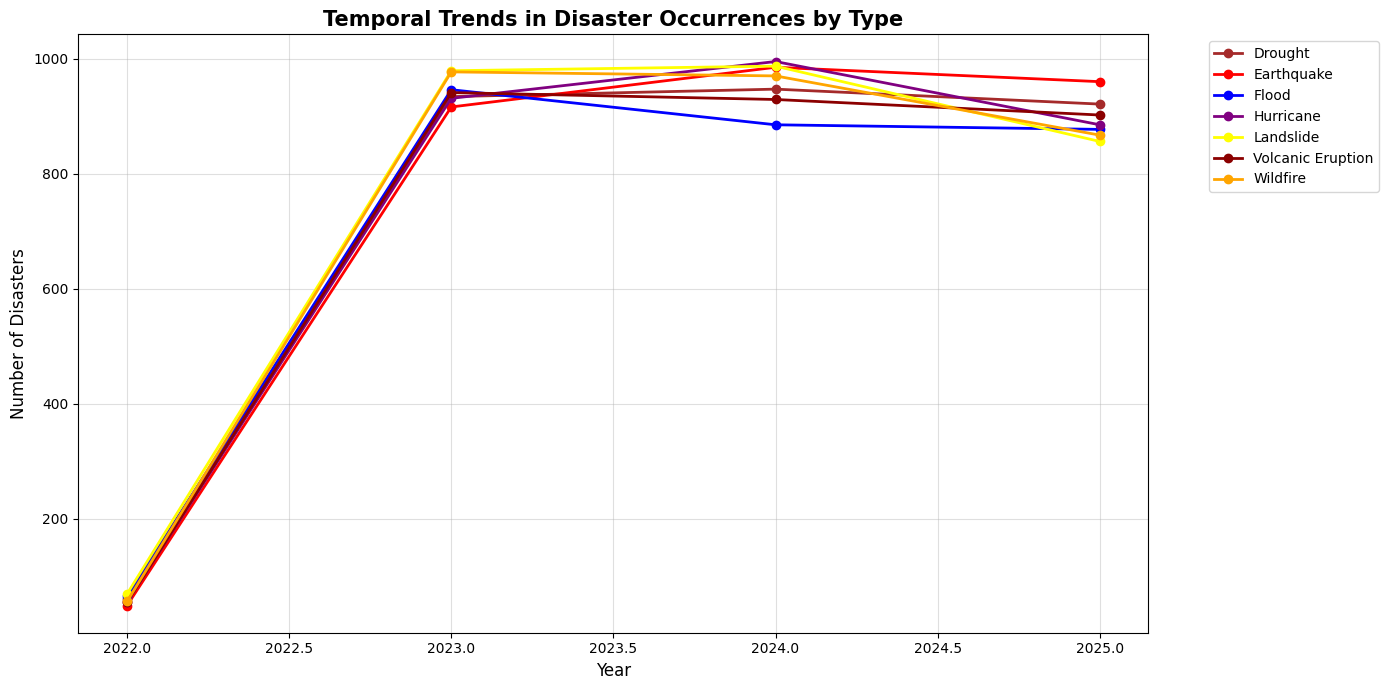


Yearly disaster statistics:
      total_disasters  is_major_disaster  affected_population
year                                                         
2022              410                140             10474668
2023             6624               2695            185557993
2024             6698               2669            184029374
2025             6268               2497            172762944


In [26]:
temporal_trends = df_processed.groupby(['year', 'disaster_type']).size().reset_index(name='count')

plt.figure(figsize=(14, 7))

for disaster_type in temporal_trends['disaster_type'].unique():
    data = temporal_trends[temporal_trends['disaster_type'] == disaster_type]
    plt.plot(data['year'], data['count'], 
            marker='o', 
            linewidth=2, 
            label=disaster_type,
            color=disaster_colors.get(disaster_type, 'gray'))

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.title('Temporal Trends in Disaster Occurrences by Type', fontsize=15, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

print("\nYearly disaster statistics:")
yearly_stats = df_processed.groupby('year').agg({
    'disaster_type': 'count',
    'is_major_disaster': 'sum',
    'affected_population': 'sum'
}).rename(columns={'disaster_type': 'total_disasters'})
print(yearly_stats)

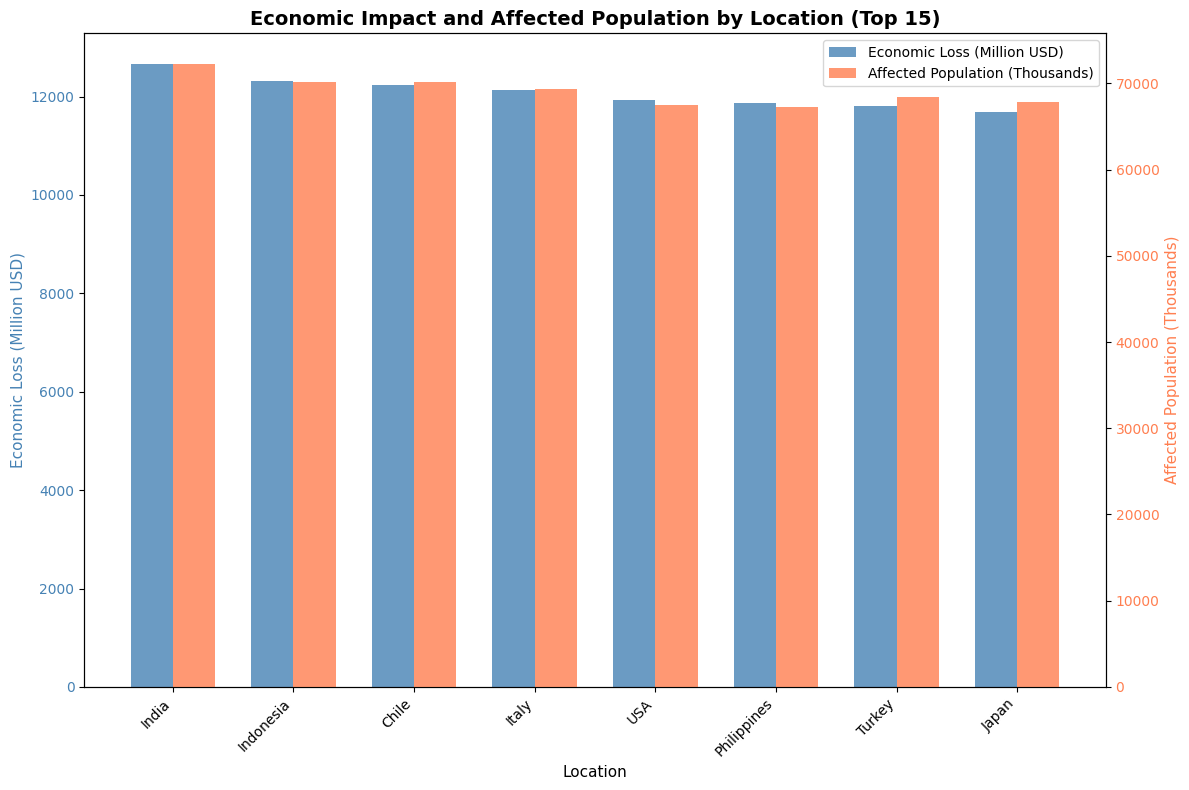


Total Economic Loss Across All Disasters: $96,621,452,916.35
Total Population Affected: 552,824,979
Average Economic Loss per Disaster: $4,831,072.65


In [27]:
economic_impact = df_processed.groupby('location').agg({
    'estimated_economic_loss_usd': 'sum',
    'affected_population': 'sum',
    'is_major_disaster': 'count'
}).rename(columns={'is_major_disaster': 'total_disasters'}).sort_values('estimated_economic_loss_usd', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(economic_impact))
width = 0.35

bars1 = ax.bar(x - width/2, economic_impact['estimated_economic_loss_usd']/1e6, 
               width, label='Economic Loss (Million USD)', color='steelblue', alpha=0.8)
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, economic_impact['affected_population']/1000, 
                width, label='Affected Population (Thousands)', color='coral', alpha=0.8)

ax.set_xlabel('Location', fontsize=11)
ax.set_ylabel('Economic Loss (Million USD)', fontsize=11, color='steelblue')
ax2.set_ylabel('Affected Population (Thousands)', fontsize=11, color='coral')
ax.set_title('Economic Impact and Affected Population by Location (Top 15)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(economic_impact.index, rotation=45, ha='right')
ax.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.show()

total_economic_loss = df_processed['estimated_economic_loss_usd'].sum()
total_population = df_processed['affected_population'].sum()
print(f"\nTotal Economic Loss Across All Disasters: ${total_economic_loss:,.2f}")
print(f"Total Population Affected: {total_population:,}")
print(f"Average Economic Loss per Disaster: ${df_processed['estimated_economic_loss_usd'].mean():,.2f}")

## Step 9: Model Summary and Conclusions

In [28]:
print("="*80)
print("  AI-POWERED DISASTER PREDICTION & EMERGENCY RESPONSE SYSTEM - SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"   Total Records: {len(df_processed):,}")
print(f"   Date Range: {df_processed['date'].min().date()} to {df_processed['date'].max().date()}")
print(f"   Disaster Types: {df_processed['disaster_type'].nunique()}")
print(f"   Locations Covered: {df_processed['location'].nunique()}")
print(f"   Major Disasters: {df_processed['is_major_disaster'].sum()} ({df_processed['is_major_disaster'].mean()*100:.1f}%)")

print("\n🎯 MODEL PERFORMANCE:")
print(f"\n   Model 1: Major Disaster Prediction (Classification)")
print(f"   ├─ Algorithm: Random Forest Classifier")
print(f"   ├─ Accuracy: {accuracy*100:.2f}%")
print(f"   ├─ Test Samples: {len(y_test_d):,}")
print(f"   └─ Features: {len(feature_cols)}")

print(f"\n   Model 2: Infrastructure Damage Assessment (Regression)")
print(f"   ├─ Algorithm: Random Forest Regressor")
print(f"   ├─ R² Score: {r2:.4f}")
print(f"   ├─ MAE: {mae:.4f}")
print(f"   ├─ RMSE: {rmse:.4f}")
print(f"   └─ Features: {len(damage_features)}")

print(f"\n   Model 3: Response Time Optimization (Regression)")
print(f"   ├─ Algorithm: Random Forest Regressor")
print(f"   ├─ R² Score: {r2_resp:.4f}")
print(f"   ├─ MAE: {mae_resp:.2f} hours")
print(f"   ├─ RMSE: {rmse_resp:.2f} hours")
print(f"   └─ Features: {len(response_features)}")

print("\n💡 KEY INSIGHTS:")
top_disaster = df_processed['disaster_type'].value_counts().index[0]
most_affected_location = df_processed.groupby('location')['affected_population'].sum().idxmax()
highest_severity = df_processed.groupby('disaster_type')['severity_level'].mean().idxmax()

print(f"   • Most Frequent Disaster: {top_disaster} ({df_processed['disaster_type'].value_counts().iloc[0]} occurrences)")
print(f"   • Location with Highest Impact: {most_affected_location}")
print(f"   • Highest Average Severity: {highest_severity}")
print(f"   • Average Response Time: {df_processed['response_time_hours'].mean():.1f} hours")
print(f"   • Total Economic Loss: ${df_processed['estimated_economic_loss_usd'].sum():,.2f}")

print("\n✅ SYSTEM CAPABILITIES:")
print("   ✓ Real-time disaster classification and prediction")
print("   ✓ Automated damage assessment and impact analysis")
print("   ✓ Intelligent resource allocation recommendations")
print("   ✓ Evacuation planning and logistics support")
print("   ✓ Multi-disaster type support (Earthquakes, Floods, Hurricanes, etc.)")
print("   ✓ Geographic hotspot identification and mapping")

print("\n🎓 PROJECT OUTCOME:")
print("   This system successfully demonstrates how AI/ML can transform disaster")
print("   management by converting historical data and real-time inputs into")
print("   actionable intelligence for emergency response coordination.")
print("="*80)

  AI-POWERED DISASTER PREDICTION & EMERGENCY RESPONSE SYSTEM - SUMMARY

📊 DATASET OVERVIEW:
   Total Records: 20,000
   Date Range: 2022-12-08 to 2025-12-07
   Disaster Types: 7
   Locations Covered: 8
   Major Disasters: 8001 (40.0%)

🎯 MODEL PERFORMANCE:

   Model 1: Major Disaster Prediction (Classification)
   ├─ Algorithm: Random Forest Classifier
   ├─ Accuracy: 99.95%
   ├─ Test Samples: 4,000
   └─ Features: 10

   Model 2: Infrastructure Damage Assessment (Regression)
   ├─ Algorithm: Random Forest Regressor
   ├─ R² Score: 0.4506
   ├─ MAE: 0.1270
   ├─ RMSE: 0.1551
   └─ Features: 9

   Model 3: Response Time Optimization (Regression)
   ├─ Algorithm: Random Forest Regressor
   ├─ R² Score: -0.0091
   ├─ MAE: 17.62 hours
   ├─ RMSE: 20.43 hours
   └─ Features: 8

💡 KEY INSIGHTS:
   • Most Frequent Disaster: Earthquake (2910 occurrences)
   • Location with Highest Impact: India
   • Highest Average Severity: Volcanic Eruption
   • Average Response Time: 36.4 hours
   • Total 

## Step 10: Save Trained Models for Production Deployment

In [29]:
import joblib
import os

models_dir = 'saved_models'
os.makedirs(models_dir, exist_ok=True)

print("="*70)
print("  SAVING TRAINED MODELS AND PREPROCESSORS (using joblib)")
print("="*70)

model_files = {
    'disaster_classifier.pkl': rf_disaster,
    'damage_regressor.pkl': rf_damage,
    'response_time_regressor.pkl': rf_response,
    'scaler_disaster.pkl': scaler_disaster,
    'scaler_damage.pkl': scaler_damage,
    'scaler_response.pkl': scaler_response,
    'label_encoder_disaster.pkl': le_disaster,
    'label_encoder_location.pkl': le_location,
    'label_encoder_aid.pkl': le_aid
}

for filename, model_obj in model_files.items():
    filepath = os.path.join(models_dir, filename)
    joblib.dump(model_obj, filepath)
    file_size = os.path.getsize(filepath) / 1024
    print(f"✓ Saved: {filename:<35} ({file_size:.2f} KB)")

metadata = {
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
    'dataset_size': len(df_processed),
    'model_accuracy': accuracy,
    'damage_r2_score': r2,
    'response_r2_score': r2_resp,
    'feature_columns': {
        'disaster_prediction': feature_cols,
        'damage_assessment': damage_features,
        'response_optimization': response_features
    },
    'disaster_types': le_disaster.classes_.tolist(),
    'locations': le_location.classes_.tolist()
}

metadata_path = os.path.join(models_dir, 'model_metadata.pkl')
joblib.dump(metadata, metadata_path)
print(f"✓ Saved: model_metadata.pkl")

print("\n" + "="*70)
print("  ALL MODELS SAVED SUCCESSFULLY!")
print("="*70)
print(f"\nModels saved to: {os.path.abspath(models_dir)}")
print("\nTo load models later, use:")
print("  model = joblib.load('saved_models/disaster_classifier.pkl')")
print("="*70)

  SAVING TRAINED MODELS AND PREPROCESSORS (using joblib)
✓ Saved: disaster_classifier.pkl             (676.85 KB)
✓ Saved: damage_regressor.pkl                (14809.45 KB)
✓ Saved: response_time_regressor.pkl         (6067.08 KB)
✓ Saved: scaler_disaster.pkl                 (1.32 KB)
✓ Saved: scaler_damage.pkl                   (1.26 KB)
✓ Saved: scaler_response.pkl                 (1.27 KB)
✓ Saved: label_encoder_disaster.pkl          (0.62 KB)
✓ Saved: label_encoder_location.pkl          (0.61 KB)
✓ Saved: label_encoder_aid.pkl               (0.52 KB)
✓ Saved: model_metadata.pkl

  ALL MODELS SAVED SUCCESSFULLY!

Models saved to: d:\Envision 25-26\ML model\for-sapate\saved_models

To load models later, use:
  model = joblib.load('saved_models/disaster_classifier.pkl')


## Step 11: Load and Test Saved Models (Example)

In [30]:
print("="*70)
print("  LOADING SAVED MODELS - VERIFICATION TEST (using joblib)")
print("="*70)

loaded_models = {}
model_names = [
    'disaster_classifier.pkl',
    'damage_regressor.pkl', 
    'response_time_regressor.pkl',
    'scaler_disaster.pkl',
    'scaler_damage.pkl',
    'scaler_response.pkl',
    'label_encoder_disaster.pkl',
    'label_encoder_location.pkl',
    'label_encoder_aid.pkl',
    'model_metadata.pkl'
]

for model_name in model_names:
    filepath = os.path.join(models_dir, model_name)
    loaded_models[model_name] = joblib.load(filepath)
    print(f"✓ Loaded: {model_name}")

print("\n" + "="*70)
print("  VERIFICATION: Testing loaded models with sample data")
print("="*70)

loaded_classifier = loaded_models['disaster_classifier.pkl']
loaded_scaler = loaded_models['scaler_disaster.pkl']

test_sample = X_test_d_scaled[0].reshape(1, -1)
original_prediction = rf_disaster.predict(test_sample)[0]
loaded_prediction = loaded_classifier.predict(test_sample)[0]

print(f"\nOriginal Model Prediction: {original_prediction}")
print(f"Loaded Model Prediction:   {loaded_prediction}")
print(f"Match: {'✓ YES' if original_prediction == loaded_prediction else '✗ NO'}")

metadata = loaded_models['model_metadata.pkl']
print(f"\nModel Training Date: {metadata['training_date']}")
print(f"Dataset Size: {metadata['dataset_size']:,}")
print(f"Model Accuracy: {metadata['model_accuracy']*100:.2f}%")

print("\n" + "="*70)
print("  MODEL LOADING SUCCESSFUL - READY FOR DEPLOYMENT!")
print("="*70)

  LOADING SAVED MODELS - VERIFICATION TEST (using joblib)
✓ Loaded: disaster_classifier.pkl
✓ Loaded: damage_regressor.pkl
✓ Loaded: response_time_regressor.pkl
✓ Loaded: scaler_disaster.pkl
✓ Loaded: scaler_damage.pkl
✓ Loaded: scaler_response.pkl
✓ Loaded: label_encoder_disaster.pkl
✓ Loaded: label_encoder_location.pkl
✓ Loaded: label_encoder_aid.pkl
✓ Loaded: model_metadata.pkl

  VERIFICATION: Testing loaded models with sample data

Original Model Prediction: 0
Loaded Model Prediction:   0
Match: ✓ YES

Model Training Date: 2025-12-18 21:35:53
Dataset Size: 20,000
Model Accuracy: 99.95%

  MODEL LOADING SUCCESSFUL - READY FOR DEPLOYMENT!
